<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Feature Selection on the Titanic Dataset

_Authors: Joseph Nelson (SF)_

---

In this lab you will explore a variety of different feature selection methods in sklearn. You will be using the titanic dataset.

You can load the titanic data as follows:

    psql -h dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com -p 5432 -U dsi_student titanic
    password: gastudents

Or alternatively load the dataset from the local folder:

    ./datasets/titanic_train.csv
    

## Some useful feature selection resources

---

- Michigan State Overview on [feature selection](http://www.cse.msu.edu/~cse802/Feature_selection.pdf) and (bonus) Texas A&M on [bidrectional feature selection](http://research.cs.tamu.edu/prism/lectures/pr/pr_l11.pdf)
- Sklearn documentation on [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html)
- Side-by-side comparison of [feature selection tactics](http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Import the data and perform EDA. Engineer any features you think are predictive of survival.

We'll be working with the titanic datasets - go ahead and import it from the dataset folder (or query for it as described above). 

In [28]:
df = pd.read_csv('./datasets/titanic_train.csv')

In [4]:
# A:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [29]:
df_pred = df.drop(columns=['Cabin','PassengerId','Name','Ticket'])

In [34]:
# Age variable fill up with median age
df_pred['Embarked'] = df_pred['Embarked'].astype('category')
df_pred['Sex'] = df_pred['Sex'].astype('category')
df_pred['Embarked'] = df_pred['Embarked'].cat.codes
df_pred['Sex'] = df_pred['Sex'].cat.codes

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int8

In [35]:
# Male is 1 , Female is 0
df_pred[['Sex']].head()

,Sex
0,1
1,0
2,0
3,0
4,1


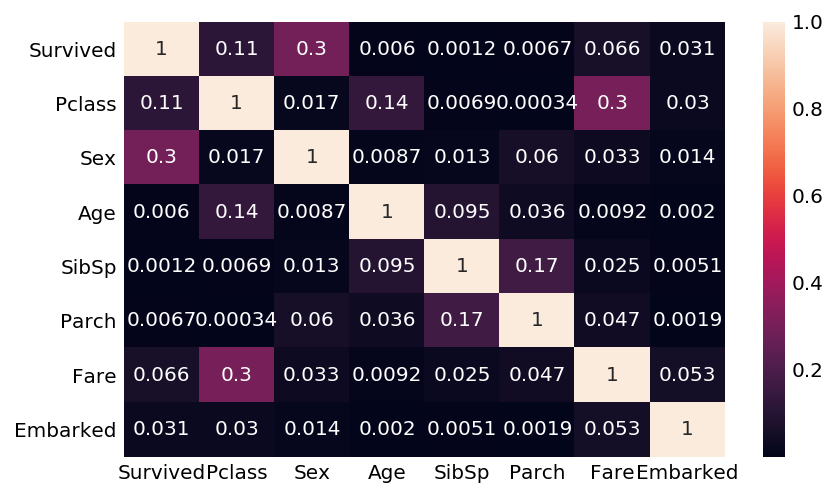

In [31]:
# EDA
sns.heatmap(df_pred.corr()**2, annot=True)

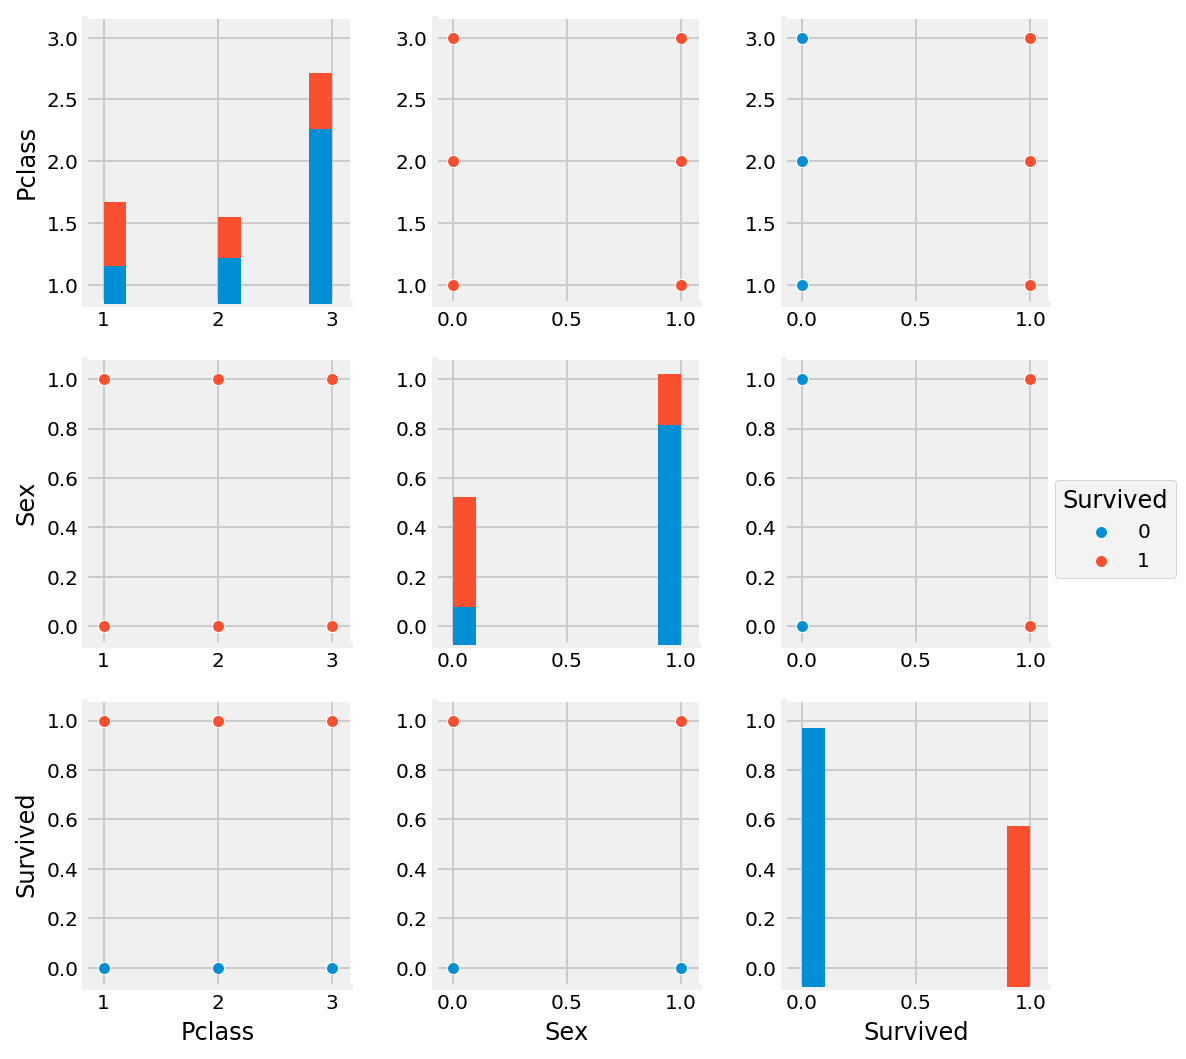

In [33]:
# check out Sex and Passenger Class using pairplot
sns.pairplot(df_pred[['Pclass','Sex','Survived']], hue='Survived')

/Users/david.yan/anaconda/envs/py27/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


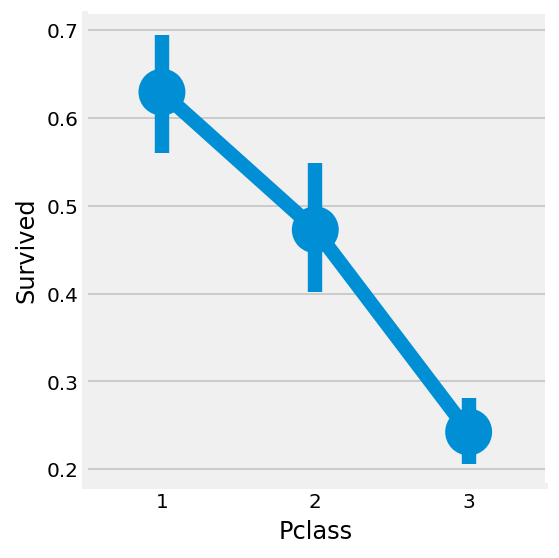

### 2. Set up predictor and target matrices

- target should be `Survived`
- predictor matrix will be all other variables

In [4]:
# A:


### 3. Feature selection

Let's use the `SelectKBest` method in scikit learn to see which are the top 5 features. Also load the `f_classif` and `chi2` functions which will be our metrics to evaluate what makes a variable the "best".

```python
from sklearn.feature_selection import SelectKBest, f_classif, chi2
```

- What are the top 5 features for `X` using `f_classif`?
- What are the top 5 features for `X` using `chi2`?


> The f-test is explained variance divided by unexplained variance. High numbers will results if our explained variance, what we know is much greater than unexplained, what we dont know. The Chi2 goodness of fit is the sum of the difference squared between observed and expected divided by expected.

In [5]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# A:

### 4. Recursive Feature Elimination (RFE)

Sklearn also offers recursive feature elimination as a class named `RFECV`. Use it in combination with a logistic regression model to see what features would be kept with this method.

When instantiating the `RFECV`:
- `step` indicates what percent of features (or number of features if an integer) to remove at each iteration.
- `cv` indicates the number of cross-validation folds to use for evaluating what features are important.

Store the columns in a variable called `rfecv_columns`.

In [6]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# A:

### 5. Feature elimination using the lasso penalty

The L1 penalty is a popular method for feature selection. As the regularization strength increases more features will be removed.

Load the `LogisticRegressionCV` class.

1. Standardize your predictor matrix (required for regularization!)
- Create a logistic regression cross-validator object :
    - Set `penalty='l1'` (Lasso).
    - Set `Cs=100` (search 100 different regularization strengths).
    - Set `solver='liblinear'` (required for the Lasso penalty).
    - Set `cv=10` for 10 cross-validation folds.
- Fit on the target and standardized predictors.
- Sort the logistic regression coefficients by absolute value. Do the top 5 correspond to those selected by the f-score and chi2?



Choose which ones you would keep and store them in a variable called `lr_columns`

In [7]:
from sklearn.preprocessing import StandardScaler

# A:

In [8]:
from sklearn.linear_model import LogisticRegressionCV

# A:

### 6. Compare features sets

Use the optimized logistic regression from the previous question on the features selected from different methods. 
- `kbest_columns`
- `rfecv_columns`
- `lasso_columns`
- `all_columns`

**Questions:**
- Which scores the highest? (use cross_val_score)
- Is the difference significant?


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [10]:
# A:

### 7. [Bonus] Display the lasso logistic regression coefficients with a barchart.

Start from the most negative on the left.

In [11]:
# A: